<a href="https://colab.research.google.com/github/Shivam-tech9696/Stockprice_prediction_using-LSTM/blob/main/Stock_price_prediuction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This program uses a artificial recurrent neural network called Long Short Term Memory called LSTM to predict the closing stock price of
# an organisation (Apple inc.) using the past 60 day stock price

In [ ]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import yfinance as yf

start = '2017-01-01'
end = '2019-12-17'
df = yf.download('AAPL', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


We need to see the imported data

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.095844,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.065519,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.203163,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.506430,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.758373,134247600
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.565025,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.124252,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.292763,137310400


In [ ]:
df.shape

(744, 6)

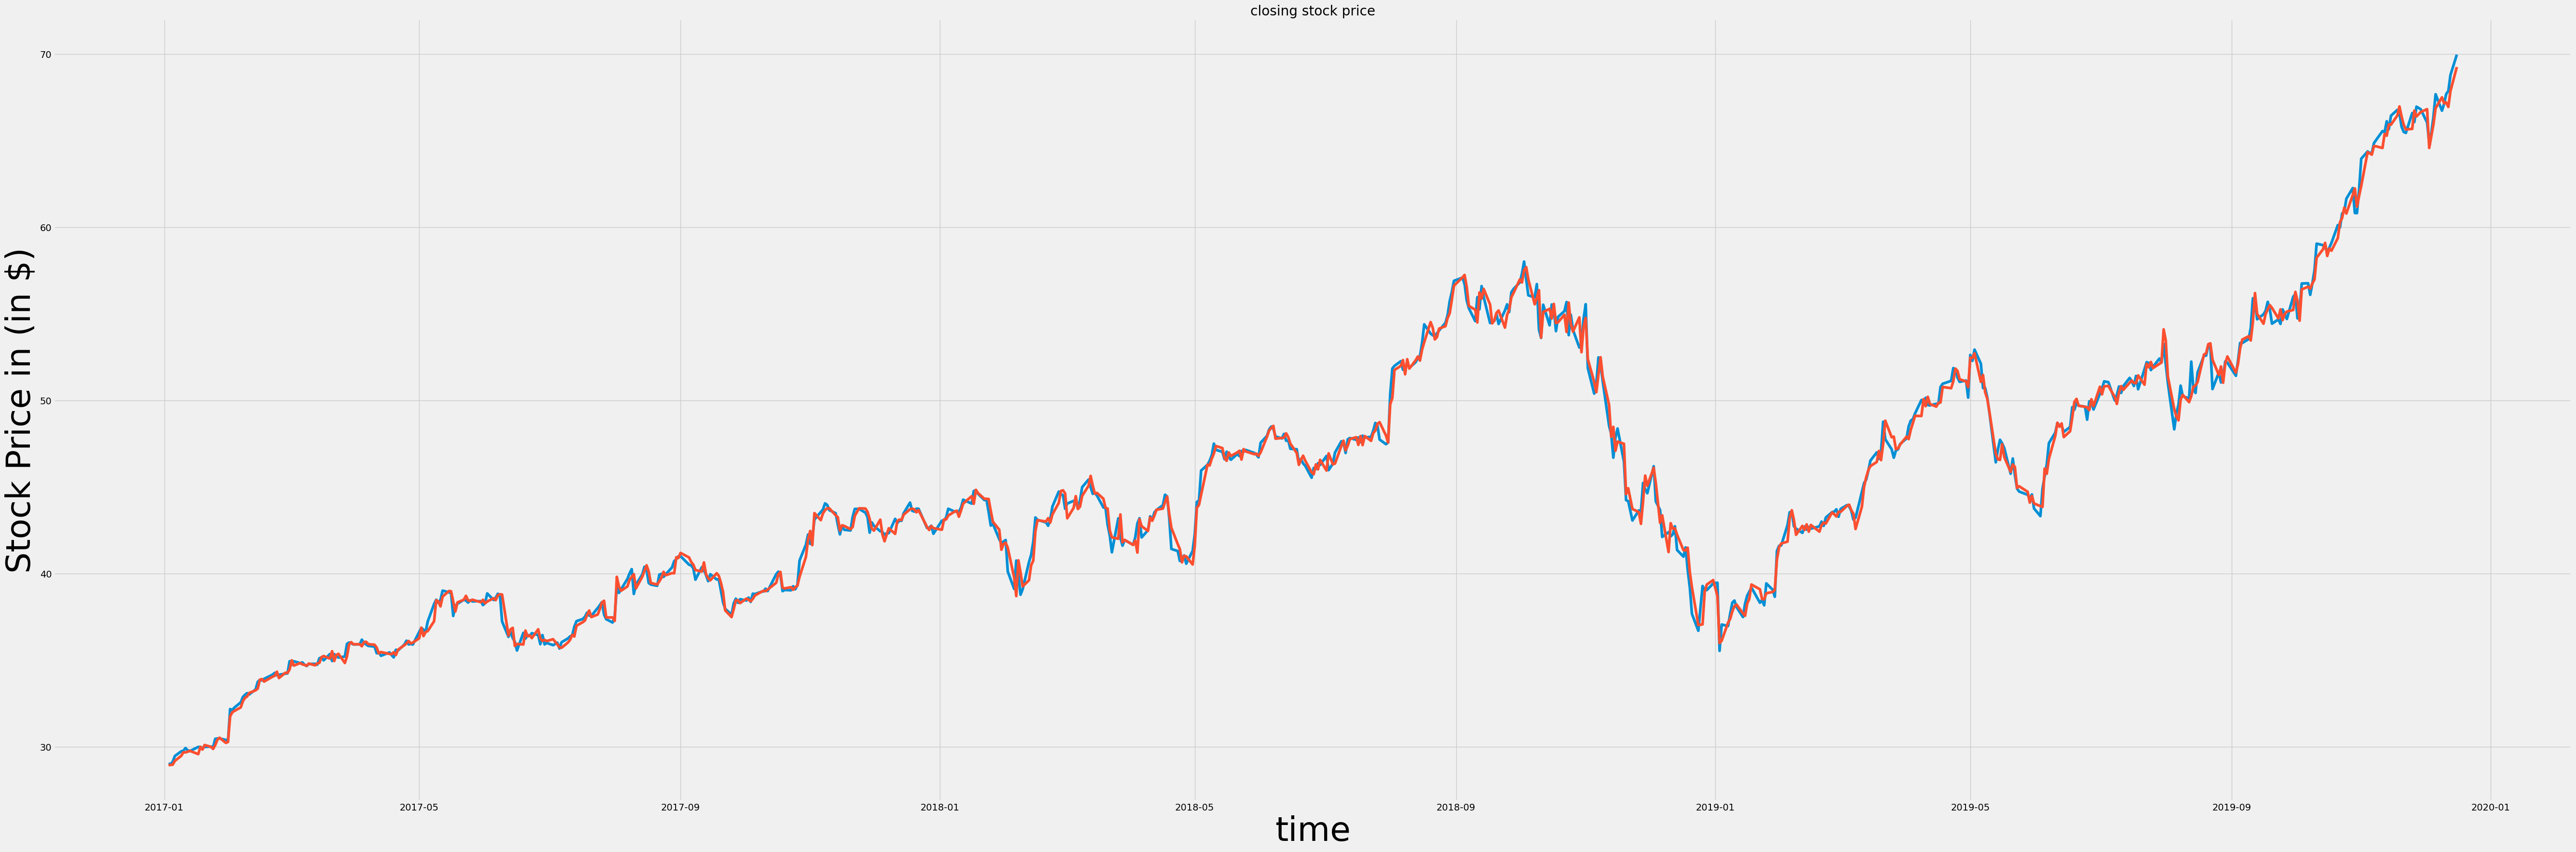

In [ ]:
# visualising the closing price history

plt.figure(figsize=(60,20))
plt.title('closing stock price')
plt.xlabel('time' , fontsize = 50)
plt.ylabel('Stock Price in (in $)', fontsize = 50)
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.show()

In [ ]:
# Create a new dataframe with only the close column
data = df.filter(['Close'])

# convert the datframe to a numpy array
dataset = data.values

# Get the number of Rows to train the model on
training_data_len = math.ceil( len(dataset)*.8)

training_data_len

596

In [ ]:
# Scale our data

scaler = MinMaxScaler(feature_range=(0,1))


Scaled_data = scaler.fit_transform(dataset)

Scaled_data

array([[7.93486888e-04],
       [0.00000000e+00],
       [3.60109868e-03],
       [1.15356882e-02],
       [1.81274501e-02],
       [1.88598888e-02],
       [2.27661353e-02],
       [1.97143773e-02],
       [1.84326445e-02],
       [2.42920144e-02],
       [2.42309662e-02],
       [2.29492334e-02],
       [2.42920144e-02],
       [2.47803068e-02],
       [2.41089163e-02],
       [3.57666078e-02],
       [3.61328504e-02],
       [3.61938520e-02],
       [3.42407287e-02],
       [3.25317517e-02],
       [7.76977798e-02],
       [7.63549988e-02],
       [7.97119512e-02],
       [8.70971535e-02],
       [9.46655469e-02],
       [9.77783066e-02],
       [1.00097672e-01],
       [9.82665990e-02],
       [1.05407702e-01],
       [1.15966851e-01],
       [1.18957515e-01],
       [1.17981023e-01],
       [1.20239294e-01],
       [1.26220714e-01],
       [1.28723178e-01],
       [1.25183127e-01],
       [1.25976614e-01],
       [1.27624496e-01],
       [1.27990785e-01],
       [1.45080556e-01],


In [ ]:
# Create the Scaled trainig datasets
train_data = Scaled_data[0: training_data_len,:]

# Split the data into X-train  and Y_train datsets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.00079349, 0.        , 0.0036011 , 0.01153569, 0.01812745,
       0.01885989, 0.02276614, 0.01971438, 0.01843264, 0.02429201,
       0.02423097, 0.02294923, 0.02429201, 0.02478031, 0.02410892,
       0.03576661, 0.03613285, 0.03619385, 0.03424073, 0.03253175,
       0.07769778, 0.076355  , 0.07971195, 0.08709715, 0.09466555,
       0.09777831, 0.10009767, 0.0982666 , 0.1054077 , 0.11596685,
       0.11895751, 0.11798102, 0.12023929, 0.12622071, 0.12872318,
       0.12518313, 0.12597661, 0.1276245 , 0.12799079, 0.14508056,
       0.14001472, 0.14501955, 0.14233399, 0.14343267, 0.14025882,
       0.13830565, 0.14111331, 0.1414795 , 0.14019782, 0.14916999,
       0.15057378, 0.14630133, 0.15527351, 0.14538575, 0.15502932,
       0.15197756, 0.15026858, 0.15173346, 0.16955571, 0.17150879])]
[0.17034910861946084]



In [ ]:
# Convert the x_train and y_train to the numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(536, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


536/536 [==============================] - 22s 33ms/step - loss: 0.0030


In [ ]:
# create the testing dataset
# create a new array containig the scaled  values from 1543 to 2003

test_data = Scaled_data[training_data_len -60:,:]

# creat the datset x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Convert the data to a NumPy array
x_test = np.array(x_test)

# Shape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# Get the model prdicted the price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 18ms/step


In [ ]:
# get the root mean square error RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.7683573542414485

In [ ]:
# plot the data
train = data[: training_data_len]
valid = data[training_data_len :]

In [ ]:
valid['predictions'] = predictions

<ipython-input-22-add9aff4bf78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

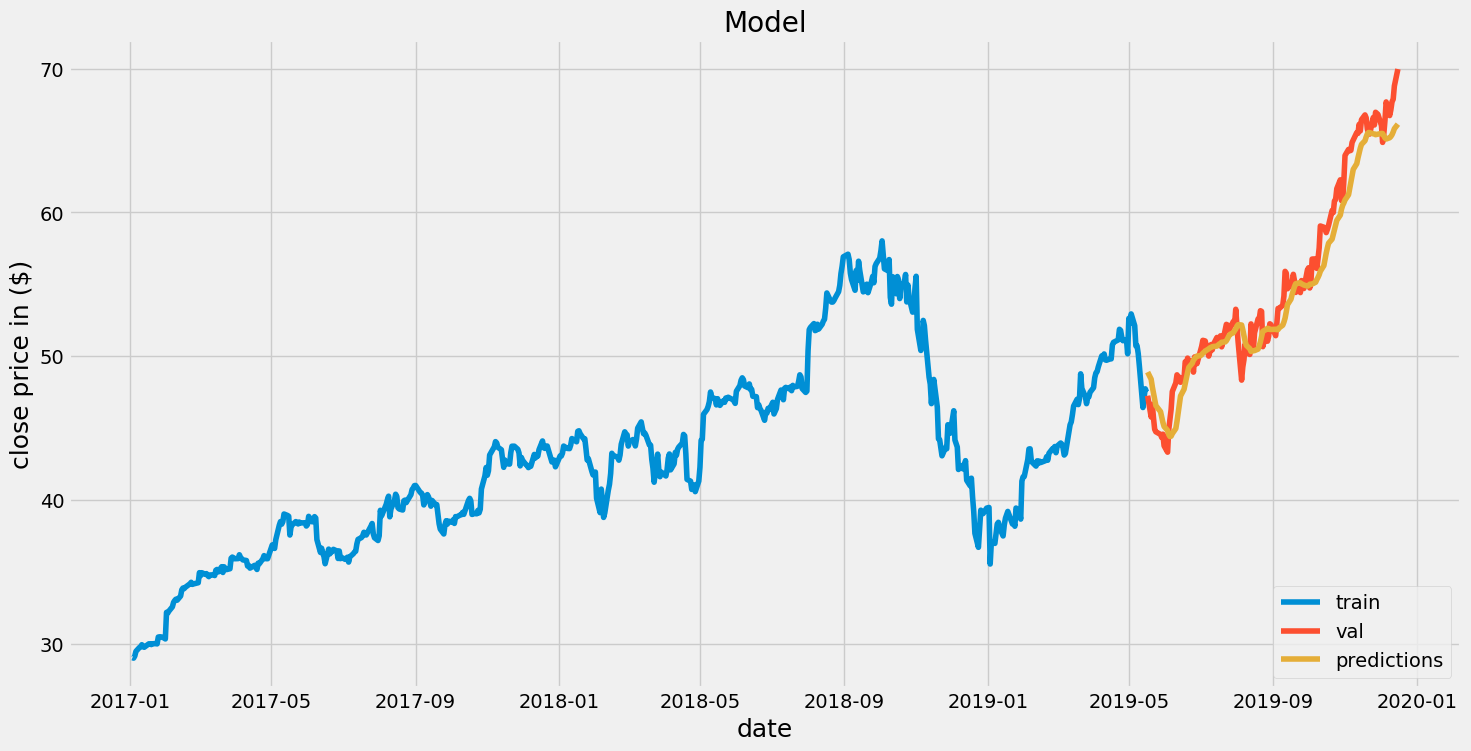

In [ ]:
# Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize = 18)
plt.ylabel('close price in ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train', 'val','predictions'], loc = 'lower right')
plt.show

In [ ]:
# Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-05-17,47.250000,48.893322
2019-05-20,45.772499,48.401134
2019-05-21,46.650002,47.868118
2019-05-22,45.695000,47.428429
2019-05-23,44.915001,47.002838
...,...,...
2019-12-10,67.120003,65.273842
2019-12-11,67.692497,65.400055
2019-12-12,67.864998,65.590614


In [32]:
#Get this code
#apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2017-1-1', end='2019-12-17')
start = '2017-01-01'
end = '2019-12-17'
apple_quote = yf.download('AAPL', start=start, end=end)


# create a new dataframe
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values

# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create an empty list
X_test = []

# append the past 60 days
X_test.append(last_60_days_scaled)

# convert the x-test dataset to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

# get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 34ms/step
[[66.579956]]


In [ ]:
import numpy as np

a = np.array([1, 2, 3])

if isinstance(a, np.ndarray):
    print("a is an ndarray")
else:
    print("a is not an ndarray")


a is an ndarray


In [33]:
# Get the quote
start = '2017-01-01'
end = '2019-12-17'
apple_quote2 = yf.download('AAPL', start=start, end=end)

print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
                ...    
2019-12-10    67.120003
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
Name: Close, Length: 744, dtype: float64
